
## Normal scaling then clustering, using elbow method


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("gm12878.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##  Elbow method

In [5]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

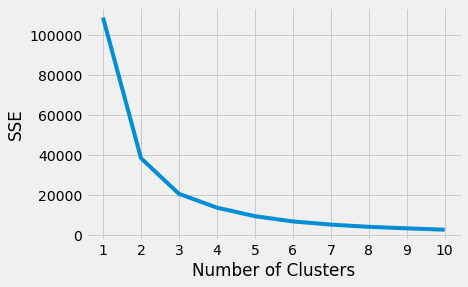

In [6]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [7]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [8]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [9]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=12)

In [10]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

20551.493646360756
[[-0.50153626 -0.50153626 -0.50153626 -0.50153626 -0.50153626 -0.50153626
  -0.50153626 -0.50153626 -0.50153626 -0.50153626 -0.50153626 -0.50153626]
 [ 0.81683582  0.81683582  0.81683582  0.81683582  0.81683582  0.81683582
   0.81683582  0.81683582  0.81683582  0.81683582  0.81683582  0.81683582]
 [ 2.93227214  2.93227214  2.93227214  2.93227214  2.93227214  2.93227214
   2.93227214  2.93227214  2.93227214  2.93227214  2.93227214  2.93227214]]
27


## Silhouette coefficient

In [11]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

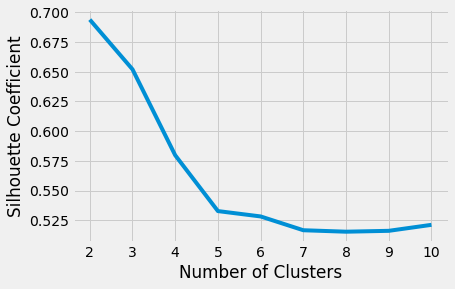

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [13]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [14]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=12)

In [15]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

38396.29190566773
[[ 1.63087642  1.63087642  1.63087642  1.63087642  1.63087642  1.63087642
   1.63087642  1.63087642  1.63087642  1.63087642  1.63087642  1.63087642]
 [-0.39676012 -0.39676012 -0.39676012 -0.39676012 -0.39676012 -0.39676012
  -0.39676012 -0.39676012 -0.39676012 -0.39676012 -0.39676012 -0.39676012]]
12
